In [1]:
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\misc')

In [2]:
from misc.__init__ import *
from misc.config import *

# Price prediction for a dummy set

In [3]:
data = pd.read_csv(train_data_path)
data.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [4]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [5]:
import math
data['bedrooms'] = data['bedrooms'].fillna(math.floor(data['bedrooms'].median()))

In [6]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
iv=data.drop(['price'], axis=1)#way 1
iv=data[['area','bedrooms','age']]#way 2
dv = data['price'].values

print(iv)
dv

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       3.0   18
3  3600       3.0   30
4  4000       5.0    8


array([550000, 565000, 610000, 595000, 760000], dtype=int64)

In [8]:
model = LinearRegression()
model.fit(iv, dv)
dv_test_pred = model.predict([[3000,3,40]])
dv_test_pred = model.predict(iv)

In [9]:
def mape(actual, predicted):
    mape_ = np.mean(np.abs(actual-predicted)/actual)
    return mape_*100

print(100-mape(dv, dv_test_pred))#accuracy


97.5684831085138


In [139]:
# Regression chart.
def chart_regression(dv_test,dv_test_pred, sort=True):
    t = pd.DataFrame({'pred': dv_test_pred, 'actual': dv_test})
    if sort:
        t.sort_values(by=['actual'], inplace=True)
    plt.plot(t['actual'].tolist(), label='actual')
    #plt.scatter(t['actual'].tolist())
    plt.plot(t['pred'].tolist(), label='predicted')
    plt.ylabel('output')
    plt.legend()#shows x,y labels set above
    plt.show()
    


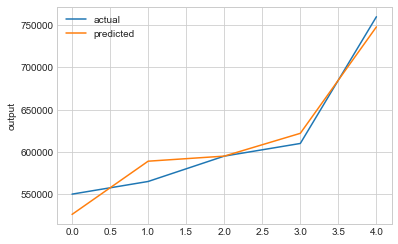

In [54]:
chart_regression(dv,dv_test_pred)

In [57]:
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
r2 = r2_score(dv, dv_test_pred)
vif = 1/(1-r2)
r2,vif
#vif >5 is indicating collinaearity issue in your iv/predictor variables

(0.9488817891373804, 19.562500000000085)

In [63]:
cor = data.corr()

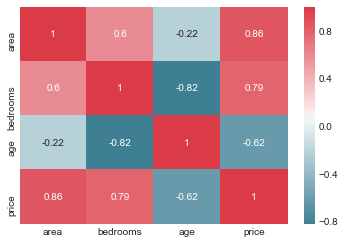

In [67]:
sb.heatmap(cor,annot=True,cmap=sb.diverging_palette(220,10,as_cmap=True))
#bedrooms is strong corr(neg) with age, lets drop age


In [16]:
iv=data.drop(['price','age'], axis=1)#way 1
#iv=data[['area','bedrooms','age']]#way 2
dv = data['price'].values
model = LinearRegression()
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.3)
model.fit(iv_train, dv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
r2

-705.0000000000006

## Basicaly ur aim is to get r2 of around 90 and vif<5 for good regression model

In [88]:
mean_squared_error(dv_test,dv_test_pred)

7110351562.5

In [20]:
iv_train

,area,bedrooms
2,3200,3.0
3,3600,3.0


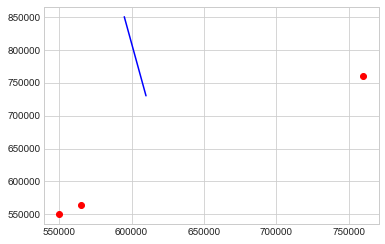

In [25]:
plt.scatter(dv_train,model.predict(iv_train),color='red')#train sets
plt.plot(dv_test,dv_test_pred,color='blue')#test predictions

# Boston dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#make a dataframe
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

In [102]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [105]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
from sklearn.model_selection import train_test_split
iv_train,iv_test, dv_train, dv_test = train_test_split(data.drop(['MEDV'],axis=1),data['MEDV'], test_size=0.2,shuffle=True,random_state=42)

In [15]:
model = LinearRegression()
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
r2_tr = r2_score(dv_train, dv_train_pred)
r2,r2_tr
mse = mean_squared_error(dv_test,dv_test_pred),mean_squared_error(dv_train, dv_train_pred)
r2,mse
#again overfit issue

(0.6687594935356294, (24.29111947497371, 21.641412753226312))

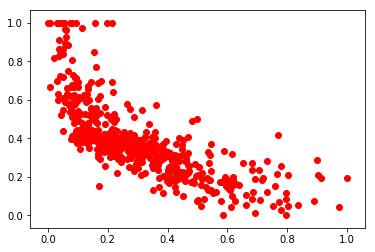

In [142]:
plt.scatter(data.LSTAT,data.MEDV,color='red')
#looks like curve will fit better than a straight line, LR wont be giving good result

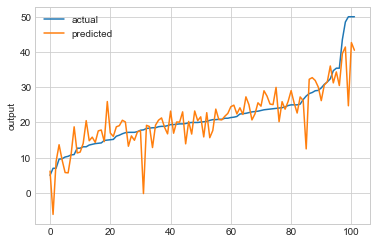

In [43]:
chart_regression(dv_test,dv_test_pred)
#LR gives more zig zag line

## correlation and covariance
correlation is a measure indicating the extent to which two or more var move together.
covariance is a measure of degree to which 2 var tend to deviate from their means, but it has units,whereas corr is unitless
high correlation doesnt imply causation. E/g sales of icecreams and sunglasses increase in summer. both have high correlation but doesnt mean buying icecream leads to but glasses. there is another var temp that might influence both variables similarly.
if coef = 0, then it implies no linear relationship, but doesnt imply that they are independent.

collinearity is alinear association b/w 2 predictors
multi-collonearity is 2 or more predictors are highly correlated . High correlation b/w iv and dv is good, but b/w iv is not good


vif = 1/(1-r2) where r2 is coeff of determination.
r2 tells how much dv can be explained by predictor
corr talks about bi-variate linear relationships but multicollinearity is multivariate. corr matrix may indicate multicollinaerity and need investigation.
How?


because of multi-collinearity, the highly dep variables influences the results heavily , the coeff signs might

Estimate of a predictor on response var tends to be less precise and less reliablle
model overfitting, it does well on train data but poor on test data 



we want to see with one unit increase in 1 predictor x1, how is target/dv affected
So in calculating vif, we take each iv 1by1 and in each iteration 1 IV is kept on lhs of regression line in place of y and all other IV are fitted on the line(obvious linear) and if r2 is high, it implies we can get this IV on lhs by a linear combination of var on RHS, and we dont need to carry it neccessarily and also vif also will be very high(see formula)
so if vif is high, it implies that this IV on LHS(which is now  DV in this case) is highly corrleated with other iv

or aim of model is to get coeff of all predictors keeping only 1 pred in consideration and others as constant, but if my IV are correlated withe ach other than 1 unit inc in 1 IV will have some effect on that corrrleated IV and will influence our results 

In [198]:
cnames = list(data.columns)

In [212]:
THR = 80
skip_vif = []
#remove dependent variable for vif analysis
cnames = [col for col in cnames if col not in['MEDV']]

for i in range(len(cnames)):
    dv = data.loc[:,data.columns==cnames[i]]
    iv = data.loc[:,data.columns!=cnames[i]]
    model = sm.OLS(dv,iv).fit()
    r2 = model.rsquared
    vif = 1/(1-r2)
    
    if round(vif,2) > THR:
        print("%s r square : %s vif %s "%(cnames[i], r2, vif))
        skip_vif.append(cnames[i])

RM r square : 0.9926525554978956 vif 136.1017425464841 
PTRATIO r square : 0.9885356904287222 vif 87.22723281176584 


In [210]:
iv.shape,dv.shape

((506, 1), (506, 13))

In [146]:
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [199]:
THR = 0.80
tmp = []
for col in data.columns:
    df = cor[col]
    tmp.append(list(df[abs(df.values) > THR].index.values))
tmp = [col for ocol in tmp  for col in ocol  if col not in tmp]
index = -1
cor_skip =[]
for col in tmp:
    repeat = False
    index += 1
    if tmp.index(col) == index:
        cor_skip.append(col)

In [144]:
def cal_unique(l1, l2, skip):
    unique = []
    #print(l1,l2)
    for item in l2:
        #print('checking',item)
        if item == skip:
            continue
        if item not in l1:
            unique.append(item)
        
    return unique

In [197]:
cal_unique(cor_skip,skip_vif,skip = 'MEDV')

[]

## Seems like both the measures told the same info

In [203]:
def leftout(l1,l2,add = []):
    left = []
    for item in cnames:
        if item not in skip_vif:
            left.append(item)
    for col in add:
        if col not in left :
            left = left+add
    return left

In [204]:
leftout(cnames,skip_vif, add = ['MEDV'])

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'B',
 'LSTAT',
 'MEDV']

In [196]:
leftout(cnames,cor_skip,add = ['MEDV'])

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'B',
 'LSTAT',
 'MEDV']

In [205]:

df = data[leftout(cnames,skip_vif,add =['MEDV'])]
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,65.2,4.0900,1.0,296.0,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,78.9,4.9671,2.0,242.0,396.9,9.14,21.6


In [207]:
iv_train.shape,dv_train.shape

((404, 11), (404,))

In [261]:
# lets build a model using these variables now
from sklearn.metrics import f1_score
iv = sm.add_constant(df.drop(['MEDV'],axis=1))
dv = df['MEDV']
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,random_state=42,stratify=data['CHAS'])
model = sm.OLS(dv_train, iv_train).fit()
print(model.summary())
#model.score(iv_test,dv_test)
#dv_test_pred = model.predict(iv_test)
#f1_score(dv_test,dv_test_pred)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     66.60
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.20e-82
Time:                        10:17:35   Log-Likelihood:                -1264.5
No. Observations:                 404   AIC:                             2553.
Df Residuals:                     392   BIC:                             2601.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.8801      3.382     13.862      0.0

C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [257]:
# lets build a model using these variables now
from sklearn.metrics import f1_score
iv = sm.add_constant(df.drop(['MEDV'],axis=1))#add a constant value in a new col
dv = df['MEDV']
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,random_state=42)
model = LinearRegression().fit(iv_train, dv_train)
dv_test_pred = model.predict(iv_test)
smmodel = sm.OLS(dv_train,iv_train).fit()
model.score(iv_test,dv_test),smmodel.rsquared
#dv_test_pred = model.predict(iv_test)
#f1_score(dv_test,dv_test_pred)

C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(0.6601864166324872, 0.6503908934288897)

In [251]:
def manual_r2(actual_, pred_):
    
    actual = actual_.values
    pred = pred_
    #print(actual,pred)
    ssr = 0.0
    sstotal = 0.0
    for i in range(len(actual)):
        ssr = ssr +(pow(actual[i] - pred[i],2))
        sstotal += (pow(actual[i] - actual.mean(),2))
    r2 = 1 - (ssr/sstotal)
    print(r2)
manual_r2(dv_test,dv_test_pred)#same as model score in linear regression

0.6601864166324882


In [43]:
variance_inflation_factor(df.values,0)

20.890180548726054

In [54]:
model = RandomForestRegressor(n_estimators=100).fit(iv_train,dv_train)


In [109]:
dv_test_pred = model.predict(iv_test)
mean_squared_error(dv_test,dv_test_pred)

8.669616735294118

In [110]:
from sklearn.metrics import r2_score

In [113]:
r2 = r2_score(dv_test,dv_test_pred)
vif= 1/(1-r2)
r2,vif
#vif should be less than 5

(0.8817786787797307, 8.458711082553423)

In [115]:
r2 = model.score(iv_test,dv_test)

0.8817786787797307

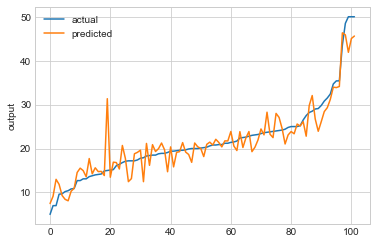

In [117]:
chart_regression(dv_test,dv_test_pred)

In [118]:
#Looks overfit, thats why vif is high
rmse = np.sqrt(mean_squared_error(dv_test,dv_test_pred))
rmse

2.9444212903886764

In [121]:
mape = np.mean(np.abs((dv_test-dv_test_pred)/dv_test))
mape*100

11.340338262363268

In [122]:
dv_train_pred = model.predict(iv_train)
rmse_train = np.sqrt(mean_squared_error(dv_train,dv_train_pred))
rmse_train

1.3476212036087298

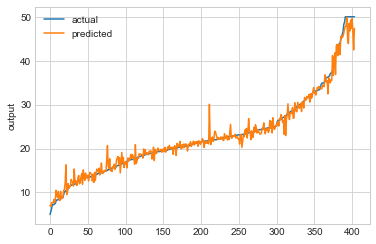

In [123]:
#fit on train data
chart_regression(dv_train,dv_train_pred)

# RMSE is more for test --> overfit problem 
Need to do feature selection and reduce the var

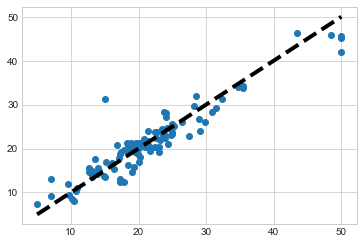

In [135]:
#fig,ax=plt.subplots()
plt.scatter(dv_test,dv_test_pred)
plt.plot([dv_test.min(),dv_test.max()],[dv_test.min(),dv_test.max()],'k--',lw=4)

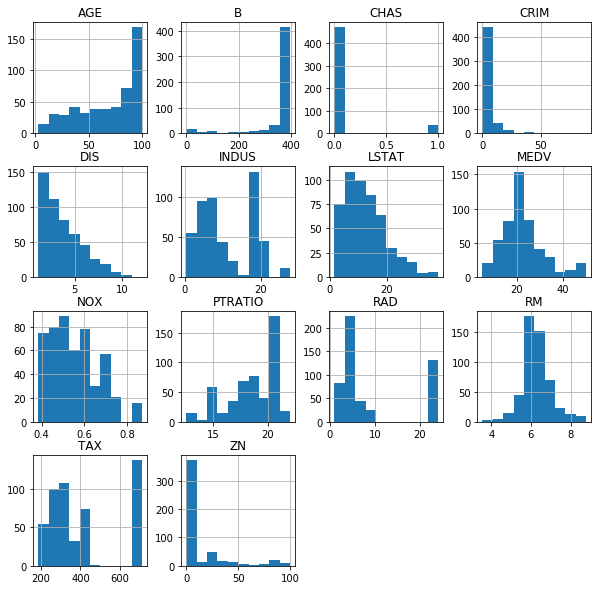

In [22]:
import matplotlib.pyplot as plt
data.hist(figsize=(10,10))
plt.show()

In [31]:
from sklearn.metrics import f1_score
iv = data.drop(['MEDV'],axis=1)
dv = data['MEDV'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,shuffle=True,random_state=42,stratify=data['CHAS'])
#model = LinearRegression().fit(iv_train, dv_train)
#dv_test_pred = model.predict(iv_test)
#f1_score(dv_test,dv_test_pred)

In [32]:
cor = data.corr()

In [33]:
abs(cor['MEDV']).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [34]:
from pandas.plotting import scatter_matrix

In [30]:
top_5 = abs(cor['MEDV']).nlargest(5)
df = data[top_5.index.values]
scatter_matrix(df,figsize=(8,8))

NameError: name 'scatter_matrix' is not defined

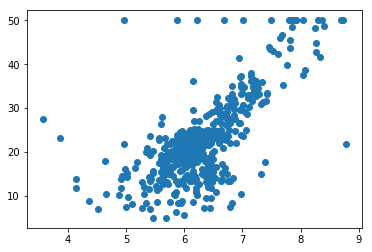

In [42]:
import seaborn as sb
plt.scatter(data['RM'],data['MEDV'])
#see the outliers

In [57]:
#set to na
data.iloc[:2,5] = np.nan

In [58]:
np.any(data.isnull().sum())

True

In [74]:
#impute
for col in data.columns:
    data.loc[:,col] = data.loc[:,col].fillna(data.loc[:,col].mean())

In [75]:
np.any(data.isnull().sum())

False

In [77]:
# see the cont and categ variables
cont = []
cat = []
for col in data.columns:
    if data.loc[:,col].dtype in ['int64','float64','int32']:
        cont.append(col)
    else:
        cat.append(col)

In [81]:
bk = data.copy() #bk=data will be a deep copy, copy() gives shallow copy, in short they are pointing to different locations

In [82]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283788,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702472,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [85]:
cont = [col for col in cont if col not in ['MEDV']]
#for col in data.columns:
    

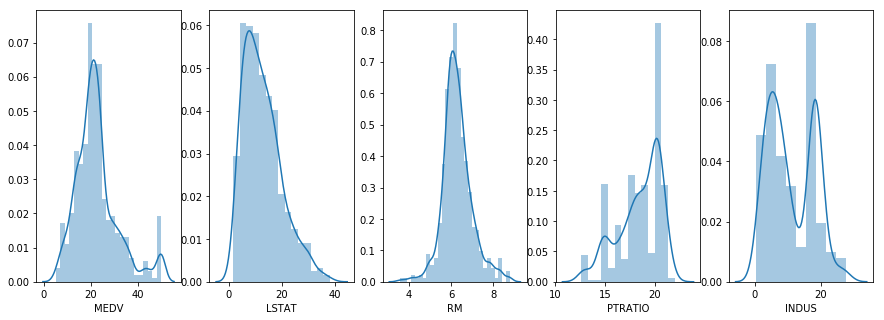

In [110]:
#lets plot distrubutions
fig,axes = plt.subplots(figsize=(15,5),ncols=len(df.columns))


for col,ax in zip(df.columns,axes):
    sb.distplot(df[col],ax=ax)
   


In [113]:
#normalization
for col in data.columns:
    data.loc[:,col] = (data.loc[:,col]-data.loc[:,col].min())/(data.loc[:,col].max()-data.loc[:,col].min())

In [135]:
model = LinearRegression()
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
r2_tr = r2_score(dv_train, dv_train_pred)
r2,r2_tr
mse = mean_squared_error(dv_test,dv_test_pred),mean_squared_error(dv_train, dv_train_pred)
r2,mse
#again overfit issue

(0.7572684891063743, (17.17124049875935, 23.32234607923367))

In [116]:
model.score(iv_test,dv_test)

0.7572684891063743

In [115]:
from sklearn.tree import DecisionTreeRegressor


In [117]:
model = DecisionTreeRegressor()
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
model.score(iv_test,dv_test)

0.7628392291117401

In [120]:
model = RandomForestRegressor(n_estimators=500)
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
model.score(iv_test,dv_test)

0.8818040451820508

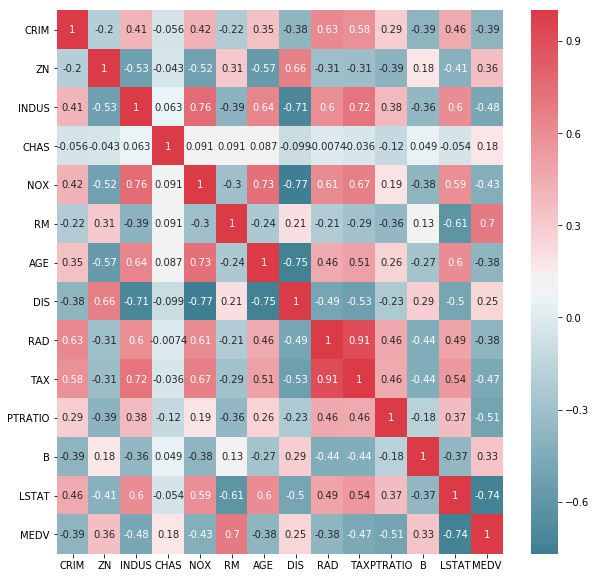

In [133]:
fig,axes = plt.subplots(figsize=(10,10))
sb.heatmap(cor,cmap=sb.diverging_palette(220,10,as_cmap=True),annot=True)

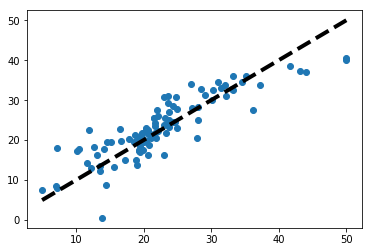

In [144]:
#fig,ax=plt.subplots()
plt.scatter(dv_test,dv_test_pred)
plt.plot([dv_test.min(),dv_test.max()],[dv_test.min(),dv_test.max()],'k--',lw=4)
#corr is good between actual and predicted

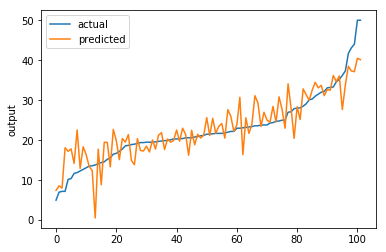

In [140]:
chart_regression(dv_test,dv_test_pred)

## Exercise:
you can remove IV which has corr>0.7 and try 

# Collinearity

In [157]:
# OLS ordinary least square ols
data = pd.read_csv(inp_data_path)

In [5]:
data.head()


,x1,x2,x3,y
0,100,110,40,3.9
1,95,110,40,2.6
2,90,120,30,2.7
3,85,110,40,3.0
4,80,100,20,2.4


In [126]:
def iv_dv_get_col_names(data,target):
    continous_names = []
    categ_names = []
    for i in data.columns:
        continous_names.append(i) if data.loc[:,i].dtypes in ['int64','int32','float32','float64'] \
        else categ_names.append(i)
    iv = data.loc[:,data.columns!=target]# data.drop(['y'],axis=1)
    dv = data.loc[:,target]
    iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2,random_state=42)
    return continous_names,categ_names, iv, dv,[iv_train, iv_test, dv_train,dv_test]

def iv_dv_get_col_names_dist_based(data,target):
    return iv_dv_get_col_names(data,target)

def plot_corr(data, target='', k = -1):
    """In case you need to plot k largest correlated features under target col passed use
    plot_corr(data[cont],'y',3); k =3 and target is 'y' here
    """
    cor = data.corr() if k == -1 else data.corr().nlargest(k,target)
    f,ax = plt.subplots(figsize=(7,7))
    return sb.heatmap(cor,annot=True,cmap="viridis")

In [159]:
#generate continous col names
cont,categ,iv,dv,testparam = iv_dv_get_col_names_dist_based(data,'y')

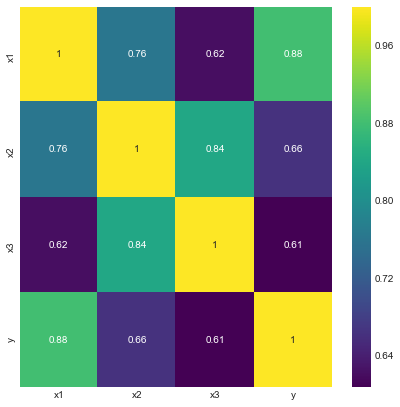

In [34]:
#plt continous variables
plot_corr(data[cont])


In [62]:
pd.Series([10,20],['x1','x2'])

x1    10
x2    20
dtype: int64

In [101]:
cnames = [col for col in cont if col not in ['y']]
cnames

['x1', 'x2', 'x3']

In [188]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def fitols(iv,dv,intercept = True):
    model = sm.OLS(dv,sm.add_constant(iv)).fit() if intercept else sm.OLS(dv,iv).fit()
    #An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant.
    return model.summary()

def vif_summary(data,target,manual=False):
    if manual:
        THR = 80
        skip_vif = []
        vif_val = []
        #remove dependent variable for vif analysis
        cnames = [col for col in cont if col not in [target]]
        tmp = data[cnames]
        for i in range(len(cnames)):
            #print('goin for',cnames[i])
            dv = data.loc[:,tmp.columns==cnames[i]]
            iv = sm.add_constant(tmp.loc[:,tmp.columns!=cnames[i]])
            #print(iv,dv)
            model = sm.OLS(dv,iv).fit()
            r2 = model.rsquared
            vif = 1/(1-r2)

            if round(vif,2) > THR:
                
                skip_vif.append(cnames[i])
            print("%s r square : %s vif %s "%(cnames[i], r2, vif))
            vif_val.append(vif)
        return pd.Series(vif_val,cnames)
    else:#use in-built
        iv_ = sm.add_constant(data.loc[:,data.columns!=target])
        return pd.Series(
            [variance_inflation_factor(iv_.values,i) for i in range(iv_.shape[1])],
            index = iv_.columns
        )
def r2(val):
    return 1/(1-val)
def cmp_model(iv_,dv_):
    print('LinearRegression: r2',LinearRegression().fit(iv_,dv_).score(iv_,dv_),'vif :',r2(LinearRegression().fit(iv_,dv_).score(iv_,dv_)))
    print('ols: r2',sm.OLS(dv,sm.add_constant(iv_)).fit().rsquared,'vif :',r2(LinearRegression().fit(iv_,dv_).score(iv_,dv_)))
    return sm.OLS(dv_,sm.add_constant(iv_)).fit().summary()


In [160]:
fitols(iv,dv)

C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     7.634
Date:                Mon, 02 Sep 2019   Prob (F-statistic):             0.0180
Time:                        12:33:00   Log-Likelihood:                -1.8962
No. Observations:                  10   AIC:                             11.79
Df Residuals:                       6   BIC:                             13.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1174      1.392      0.084      0.936      -3.288       3.523
x1             0.0406      0.013      3.160      0.020       0.009       0.072
x2            -0.0108      0.020     -0.535      0.612      -0.060       0.039
x3             0.0100      0.015      0.670      0.528      -0.026       0.046
==============================================================================
Omnibus:                        0.524   Durbin-Watson:                   2.531
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.158
Skew:                          -0.272   Prob(JB):                        0.924
Kurtosis:                       2.711   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretation
score is 79% telling that 79% of effect on DV is explained by IV

F-statistic: significance value of results: High(good)
Rsquared value is very large indicating multicollinear issue(in case you use without sm.add_constant)
coeff in the summary are negative, but corr values are all positive for these predictors
p-value (with 95% confidence interval) is >0.05 for x2 and x3, signifies thay they are not significant(fail to reject the null hyp- which states that they are independent and would not be significant in determination of TV/DV here, and we should ignore them.
All these are indicative of multiple IV are collinear with each

## caluclate VIF manually and through in-built function

In [161]:
vif_summary(data,'y',manual=True)

x1 r square : 0.5805675805675805 vif 2.3841743119266052 
x2 r square : 0.8011110210039737 vif 5.027930682976554 
x3 r square : 0.7094000636890787 vif 3.441156982670743 


x1    2.384174
x2    5.027931
x3    3.441157
dtype: float64

In [117]:
vif_summary(data,'y')

const    135.871560
x1         2.384174
x2         5.027931
x3         3.441157
dtype: float64

## what does it tell?
x2 has vif >5 indicates that 80% of x2 can be explained by other IV(i.e. x2 is collinear with other IV)

## EXPERIMENT : Data related collinearity
Check how much of x1 is collinear with x2,x3

calculate r2 and vif for x1 with LinearRegression and sm.OLS 

observe they are same

In [148]:
iv_ = data[['x2','x3']]
dv_ = data['x1']
cmp_model(iv_,dv_)


LinearRegression: r2 0.5805675805675805 vif : 2.3841743119266052
ols: r2 0.4469095573196521 vif : 2.3841743119266052


C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x1   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     4.845
Date:                Mon, 02 Sep 2019   Prob (F-statistic):             0.0478
Time:                        12:24:20   Log-Likelihood:                -36.491
No. Observations:                  10   AIC:                             78.98
Df Residuals:                       7   BIC:                             79.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1111     40.762     -0.273      0.793    -107.497      85.275
x2             0.8862      0.491      1.806      0.114      -0.274       2.047
x3            -0.0661      0.438     -0.151      0.884      -1.102       0.969
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.067
Skew:                          -0.192   Prob(JB):                        0.967
Kurtosis:                       2.882   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
#on bigger dataset if u need to split in to train and test
#generate continous col names
cont,categ,iv,dv,testparam = iv_dv_get_col_names_dist_based(data.drop(['x2'],axis=1),'y')
iv_train, iv_test, dv_train,dv_test = testparam[0],testparam[1],testparam[2],testparam[3]

model = LinearRegression()
model.fit(iv_train, dv_train)
#dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
#r2_tr = r2_score(dv_train, dv_train_pred)
#print(r2,r2_tr)
mse = mean_squared_error(dv_test,dv_test_pred)#,mean_squared_error(dv_train, dv_train_pred)
print(r2,mse)
#again overfit issue

0.1257041433323457 0.2644744966419655


In [136]:
model.coef_

array([0.04052701, 0.0040448 ])

## Model with x2 removed
p-val of x3 suggests that it is not significant and x1 is

In [162]:
iv_ = data[['x1','x3']]
dv_ = data['y']
print(cmp_model(iv_,dv_))#Here we saw an increase in model score 

LinearRegression: r2 0.7825027962129525 vif : 4.597760258927763
ols: r2 0.7825027962129526 vif : 4.597760258927763
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     12.59
Date:                Mon, 02 Sep 2019   Prob (F-statistic):            0.00480
Time:                        12:37:06   Log-Likelihood:                -2.1291
No. Observations:                  10   AIC:                             10.26
Df Residuals:                       7   BIC:                             11.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Model with x2,x3 removed
Model score has gone down but coeff of x1 imporoved a little,as well as F-statistics(that is significance value of this test), along with probability of this happeining on unknown datasets

In [151]:
iv_ = data['x1'].values.reshape(-1,1)
dv_ = data['y'].values.reshape(-1,1)
print(cmp_model(iv_,dv_))#Here we saw an increase in model score 

LinearRegression: r2 0.7766943886817705 vif : 4.478167808219181
ols: r2 0.7766943886817705 vif : 4.478167808219181
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     27.83
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           0.000751
Time:                        12:25:26   Log-Likelihood:                -2.2609
No. Observations:                  10   AIC:                             8.522
Df Residuals:                       8   BIC:                             9.127
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Structural collinerity
Add a linearly dependent variable x4 to data

In [165]:
data['x4'] = data['x1'] +data['x2']+data['x3']

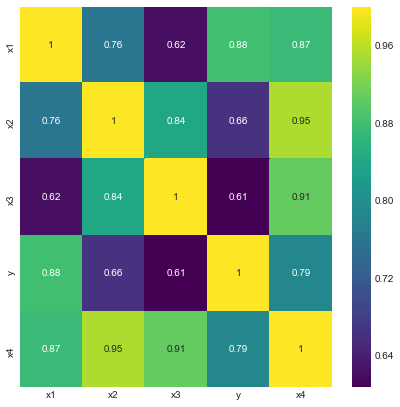

In [167]:
plot_corr(data)
#As x4 is a linear combination of other IV, the corr coeff are also high

In [169]:
cont,categ,iv,dv,testparam = iv_dv_get_col_names_dist_based(data,'y')
fitols(iv,dv)
#Notice the coefficients

C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     7.634
Date:                Mon, 02 Sep 2019   Prob (F-statistic):             0.0180
Time:                        12:50:02   Log-Likelihood:                -1.8962
No. Observations:                  10   AIC:                             11.79
Df Residuals:                       6   BIC:                             13.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1174      1.392      0.084      0.936      -3.288       3.523
x1             0.0306      0.012      2.457      0.049       0.000       0.061
x2            -0.0207      0.020     -1.048      0.335      -0.069       0.028
x3          4.511e-05      0.015      0.003      0.998      -0.036       0.036
x4             0.0099      0.002      4.261      0.005       0.004       0.016
==============================================================================
Omnibus:                        0.524   Durbin-Watson:                   2.531
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.158
Skew:                          -0.272   Prob(JB):                        0.924
Kurtosis:                       2.711   Cond. No.                     1.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [170]:
vif_summary(data,'y')

C:\Users\PAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\PAT\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const    135.87156
x1             inf
x2             inf
x3             inf
x4             inf
dtype: float64

# weight of the coeff in linear regression
y=beta0 + beta1 * x1+ beta2 * x2

beta1 = inverse((ivTiv)) * transpose(iv) *dv [ or (xTx)-1 * x-1 * y]

If rank of a matrix(no of independent variables/col) is < than actual of col (i.e. multi collinearity present), then x becomes a singular matrix and inverse doesnt exist, so coeff are weird

In [195]:
cov_matrix = np.dot(iv.T,iv)#dot product
cov_matrix

array([[ 62125,  80500,  22250, 164875],
       [ 80500, 105800,  29200, 215500],
       [ 22250,  29200,   9500,  60950],
       [164875, 215500,  60950, 441325]], dtype=int64)

In [196]:
from numpy.linalg import matrix_rank, inv
matrix_rank(cov_matrix)# out of 4 col i had, only 3 are independent(i.e i col is collinear or linearly dep on other IV)

3

In [197]:
inv_ = inv(cov_matrix)
inv_

array([[ 2.18171848e+11,  2.18171848e+11,  2.18171848e+11,
        -2.18171848e+11],
       [ 2.18171848e+11,  2.18171848e+11,  2.18171848e+11,
        -2.18171848e+11],
       [ 2.18171848e+11,  2.18171848e+11,  2.18171848e+11,
        -2.18171848e+11],
       [-2.18171848e+11, -2.18171848e+11, -2.18171848e+11,
         2.18171848e+11]])

In [198]:
weights = np.dot(np.dot(inv_,iv.T),dv)
weights

array([-0.17858887,  0.3475647 ,  0.06004028, -0.10853882])

In [189]:
fitols(iv,dv,intercept=False)

C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           6.72e-07
Time:                        13:05:25   Log-Likelihood:                -1.9021
No. Observations:                  10   AIC:                             9.804
Df Residuals:                       7   BIC:                             10.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0304      0.011      2.692      0.031       0.004       0.057
x2            -0.0194      0.011     -1.844      0.108      -0.044       0.005
x3            -0.0010      0.008     -0.131      0.899      -0.019       0.017
x4             0.0100      0.002      5.540      0.001       0.006       0.014
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   2.500
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.131
Skew:                          -0.234   Prob(JB):                        0.937
Kurtosis:                       2.692   Cond. No.                     1.69e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## what do we see?
the coeff of iv in sm.ols and what we calculated are different, as sm.ols would handle this situation differently

# Lets try with non-collinear IV and see

In [201]:
iv_sliced = iv.iloc[:,0:2]
cov_matrix = np.dot(iv_sliced.T,iv_sliced)
inv_ = inv(cov_matrix)
weights = np.dot(np.dot(inv_,iv_sliced.T),dv)
weights

array([ 0.04079503, -0.0070794 ])

In [202]:
fitols(iv_sliced,dv,intercept=False)

C:\Users\PAT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     255.3
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.66e-08
Time:                        13:12:03   Log-Likelihood:                -2.5469
No. Observations:                  10   AIC:                             9.094
Df Residuals:                       8   BIC:                             9.699
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0408      0.012      3.458      0.009       0.014       0.068
x2            -0.0071      0.009     -0.783      0.456      -0.028       0.014
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   2.563
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.333
Skew:                           0.332   Prob(JB):                        0.847
Kurtosis:                       2.402   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Notice them to be same

# Knn implementation

In [17]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [15]:
rmse_err = []
for k in range(1,21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(iv_train,dv_train)
    dv_test_pred = model.predict(iv_test)
    err =np.sqrt(mean_squared_error(dv_test,dv_test_pred))
    rmse_err.append(err)
    print('rmse error for k %s is %s'%(k,err))

NameError: name 'KNeighborsRegressor' is not defined

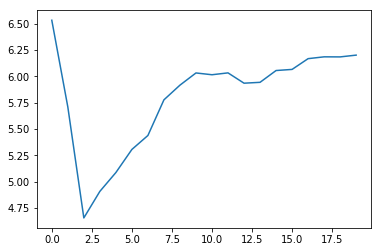

In [13]:
plt.plot(rmse_err)

In [14]:
### k =2 gives the best result
model = neighbors.KNeighborsRegressor(n_neighbors=2)
model.fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.5554646251776688